In [1]:
import numpy as np
from starfish.set import settings

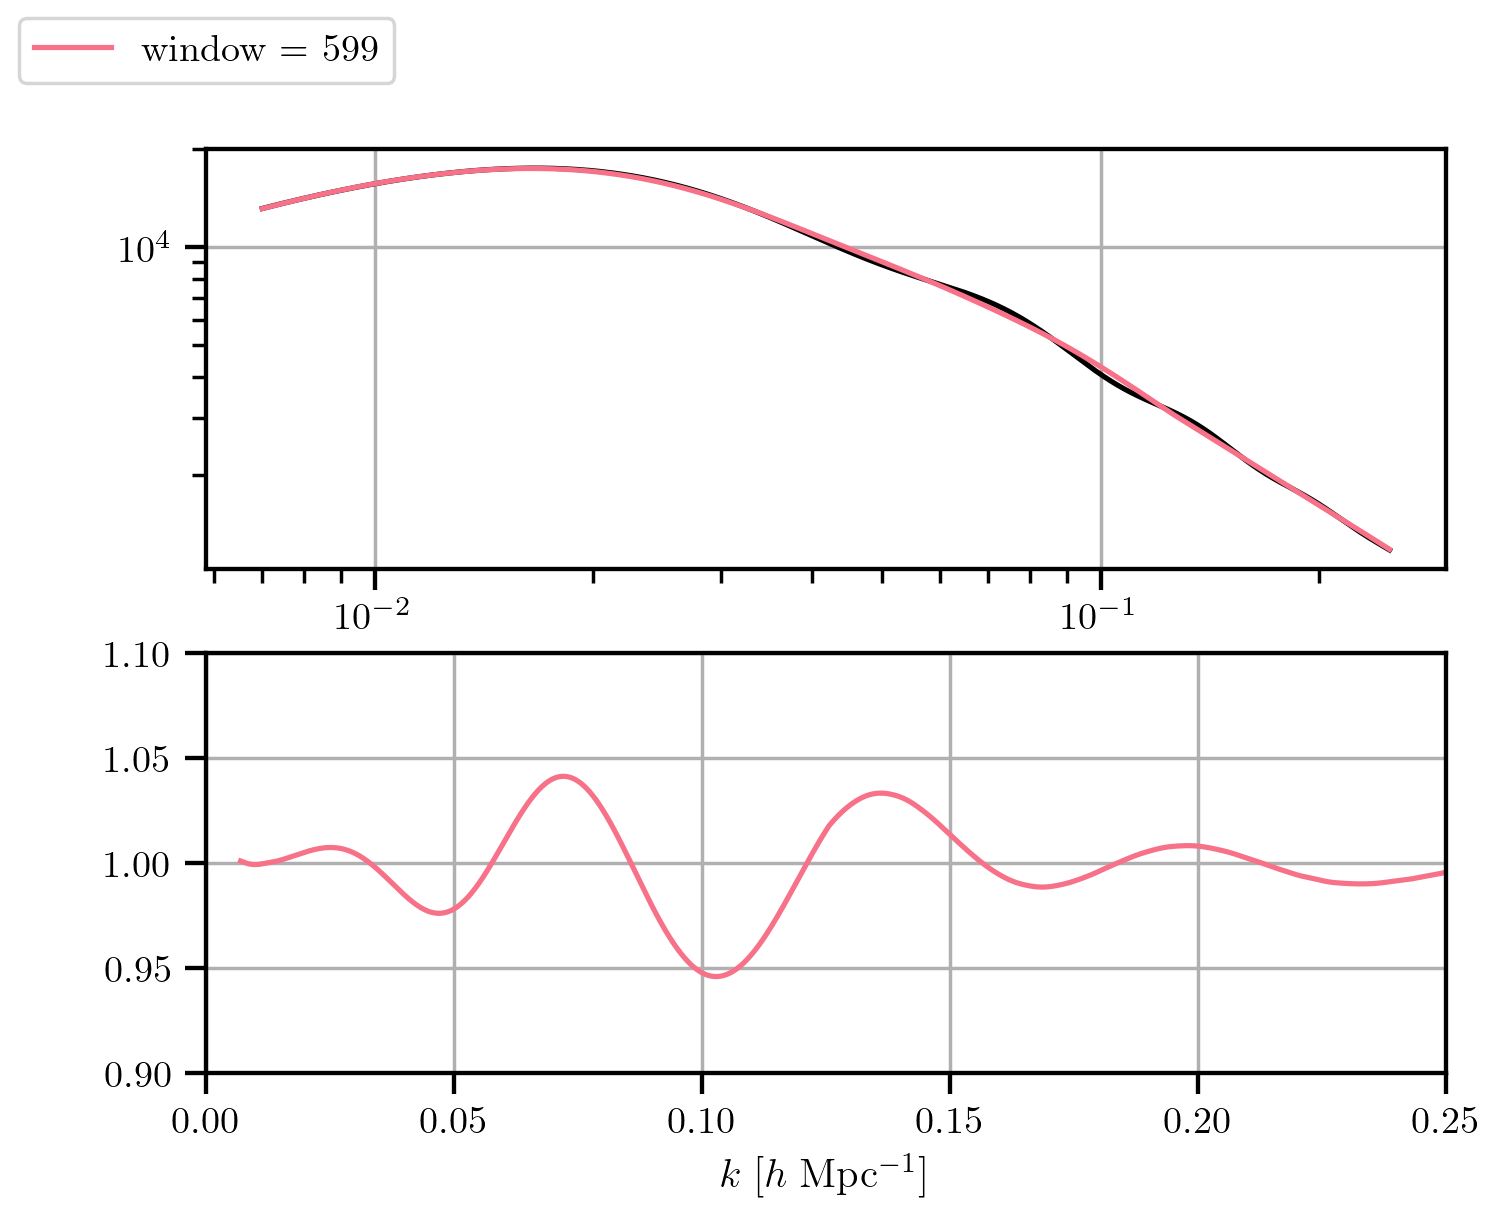

In [2]:
from starfish.galaxy.power import P_lin_w0wacdm
from starfish.plot import check_wiggle
pars,res,PK=P_lin_w0wacdm(*settings.cosmo_value)
check_wiggle(PK,window_array=settings.window_len)

In [3]:
from starfish.galaxy.multitracer import get_Fisher
fisher=get_Fisher(lcdm=False)

process started!
fiducial volumes:
V_fid (0.3) = 8.66e+08
V_fid (0.5) = 1.89e+09
V_fid (0.7) = 2.95e+09
V_fid (0.9) = 3.90e+09
V_fid (1.1) = 4.70e+09
V_fid (1.3) = 5.32e+09
V_fid (1.5) = 5.77e+09
V_fid (1.7) = 6.10e+09
V_fid (1.9) = 6.31e+09
V_fid (2.1) = 6.44e+09
V_fid (2.3) = 6.50e+09
V_fid (2.5) = 6.51e+09
V_fid (2.7) = 6.48e+09
V_fid (2.9) = 6.42e+09
V_fid (3.1) = 6.34e+09
V_fid (3.3) = 6.24e+09
V_fid (3.5) = 6.14e+09
V_fid (3.7) = 6.02e+09
V_fid (3.9) = 5.91e+09
fiducial biases:
#################### tracer: LRG ####################
b_fid (0.3) = 2.00
b_fid (0.5) = 2.22
b_fid (0.7) = 2.45
b_fid (0.9) = 2.69
b_fid (1.1) = 2.93
b_fid (1.3) = 3.19
b_fid (1.5) = 3.44
b_fid (1.7) = 3.70
b_fid (1.9) = 3.96
b_fid (2.1) = 4.22
b_fid (2.3) = 4.49
b_fid (2.5) = 4.75
b_fid (2.7) = 5.02
b_fid (2.9) = 5.28
b_fid (3.1) = 5.55
b_fid (3.3) = 5.82
b_fid (3.5) = 6.08
b_fid (3.7) = 6.35
b_fid (3.9) = 6.62
#################### tracer: ELG ####################
b_fid (0.3) = 0.99
b_fid (0.5) = 1.09
b_fi

In [4]:
import pandas as pd
cosmo_name=settings.var_name[:settings.cosmo_num]
fisher_valid=fisher.copy()
for index in fisher.index:
    if (fisher_valid.loc[index,:]==0).all():
        fisher_valid=fisher_valid.drop(index,axis=0)
        fisher_valid=fisher_valid.drop(index,axis=1)
fisher_valid.to_excel(settings.save_path+'valid.xlsx')
cov_valid=pd.DataFrame(np.linalg.inv(fisher_valid.values)[:settings.cosmo_num,:settings.cosmo_num],index=cosmo_name,columns=cosmo_name)

In [5]:
name_width=max([len(v) for v in cosmo_name])
error_dict=dict(zip(cosmo_name,np.sqrt(np.diag(cov_valid.values))))
print('1-sigma errors:')
for key in error_dict.keys():
    print(f'-- {key.rjust(name_width)}: {error_dict[key]:.1e}')

1-sigma errors:
-- omega_m0: 1.4e-02
-- omega_b0: 4.0e-03
--        h: 1.6e-02
--      n_s: 1.8e-02
--  sigma_8: 2.9e-02
--     m_nu: 3.1e-01
--    N_eff: 6.2e-01
--       w0: 1.1e-01
--       wa: 4.6e-01
